# OpenCV
- OpenCV (Open Source Computer Vision)은 오픈 소스 컴퓨터 비전 라이브러리
- OpenCV는 단일 이미지나 동영상의 이미지를 원하는 결과를 분석 및 추출하기 위한 API
- 객체ㆍ얼굴ㆍ행동 인식, 독순, 모션 추적 등의 응용 프로그램에서 사용
- 사이트: https://docs.opencv.org/4.2.0/d1/dfb/intro.html
> `!pip install opencv-python`

In [1]:
import cv2
print(cv2.getVersionString())  # 설치 확인
print(cv2.__version__)

4.5.1
4.5.1


# 이미지 출력
- cv2.IMREAD_UNCHANGED : 원본 사용
- cv2.IMREAD_GRAYSCALE : 1 채널, 그레이스케일 적용
- cv2.IMREAD_COLOR : 3 채널, BGR 이미지 사용
- cv2.IMREAD_ANYDEPTH : 이미지에 따라 정밀도를 16/32비트 또는 8비트로 사용
- cv2.IMREAD_ANYCOLOR : 가능한 3 채널, 색상 이미지로 사용
- cv2.IMREAD_REDUCED_GRAYSCALE_2 : 1 채널, 1/2 크기, 그레이스케일 적용
- cv2.IMREAD_REDUCED_GRAYSCALE_4 : 1 채널, 1/4 크기, 그레이스케일 적용
- cv2.IMREAD_REDUCED_GRAYSCALE_8 : 1 채널, 1/8 크기, 그레이스케일 적용
- cv2.IMREAD_REDUCED_COLOR_2 : 3 채널, 1/2 크기, BGR 이미지 사용
- cv2.IMREAD_REDUCED_COLOR_4 : 3 채널, 1/4 크기, BGR 이미지 사용
- cv2.IMREAD_REDUCED_COLOR_8 : 3 채널, 1/8 크기, BGR 이미지 사용

In [14]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image1.jpg', cv2.IMREAD_UNCHANGED)
cv2.imshow('image sample', img)
cv2.waitKey(0)   # 키 입력 대기 시간으로 입력이 없으면 종료, 0 이면 무한대기
cv2.destroyAllWindows()

In [15]:
img.shape  # height, width, channel

(400, 740, 3)

In [8]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image1.jpg', cv2.IMREAD_GRAYSCALE)  # 흑백 출력
cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image1.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_2)  # 흑백 사이즈 축소
cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img.shape    # 흑백이기 때문에 1채널

(200, 370)

In [18]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image2.jpg', cv2.IMREAD_COLOR)
cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
img.shape

(1729, 1200, 3)

In [20]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image2.jpg', cv2.IMREAD_REDUCED_COLOR_4)   # 크기 줄이기
cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
img.shape

(433, 300, 3)

## 사진 사이즈에 따라 출력 크기 조정

In [11]:
import cv2

img = cv2.imread('C:/Users/dojun/Documents/videosamples/image2.jpg', cv2.IMREAD_COLOR)
if img.shape[0] > 1000 or img.shape[1] > 1000:
    img = cv2.imread('C:/Users/dojun/Documents/videosamples/image2.jpg', cv2.IMREAD_REDUCED_COLOR_4)
elif img.shape[0] > 600 or img.shape[1] > 600:
    img = cv2.imread('C:/Users/dojun/Documents/videosamples/image2.jpg', cv2.IMREAD_REDUCED_COLOR_2)

cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img.shape   # 1000 보다 크기 때문에 1/4로 크기를 줄여서 출력

(433, 300, 3)

In [25]:
cv2.imwrite('./py_data/videos/img2_reduced.jpg', img)

True

- `cv2.WINDOW_NORMAL`: 원본 이미지 크기로 윈도우 창 생성, 사용자가 크기 조정 가능
- `cv2.WINDOW_AUTOSIZE`: 원본 이미지 크기로 윈도우 창 생성, 사이즈 조절 불가

In [16]:
img = cv2.imread('C:/Users/dojun/Documents/videosamples/image1.jpg', cv2.IMREAD_COLOR)

cv2.namedWindow('image sample', cv2.WINDOW_NORMAL)
# cv2.namedWindow('image sample', cv2.WINDOW_AUTOSIZE)

cv2.imshow('image sample', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 반전 - cv2.flip

In [20]:
src = cv2.imread("C:/Users/dojun/Documents/videosamples/glass.jpg", cv2.IMREAD_COLOR)
dst1 = cv2.flip(src, 0)            # 0보다 낮은 값: 상하방향
dst2 = cv2.flip(src, 1)            # 1보다 높은 값: 좌우방향 대칭
                                  

cv2.imshow("original", src)
cv2.waitKey(0)
cv2.destroyAllWindows()    
    
cv2.imshow('upside down', dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("left to right", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 회전 - cv2.getRotationMatrix2D

In [23]:
src = cv2.imread("C:/Users/dojun/Documents/videosamples/glass.jpg", cv2.IMREAD_COLOR)

height, width, channel = src.shape                                # 이미지의 높이, 너비, 채널의 값을 확인                                                                
matrix1 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)     # 높이와 너비를 이용하여 회전 중심점을 설정
matrix2 = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)   # (중심점 X좌표, 중심점 Y좌표), 각도, 스케일

dst1 = cv2.warpAffine(src, matrix1, (width, height))
dst2 = cv2.warpAffine(src, matrix2, (width, height))
# cv2.warpAffine(원본 이미지, 배열, (결과 이미지 너비, 결과 이미지 높이))을 의미
# 결과 이미지의 너비와 높이로 크기가 선언되며 배열에 따라 이미지가 회전

cv2.imshow("original", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("turn 90", dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("turn 90, scaled 1/2", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 확대 / 축소 - cv2.pyrUp / cv2.pyrDown

In [37]:
src = cv2.imread("C:/Users/dojun/Documents/videosamples/glass.jpg", cv2.IMREAD_COLOR)

height, width, channel = src.shape              # 너비와 높이를 이용하여 dstsize (결과 이미지 크기)
dst1 = cv2.pyrUp(src, dstsize=(width*2, height*2), borderType=cv2.BORDER_DEFAULT) 
# cv2.pyrUp(원본 이미지, 결과 이미지 크기, 픽셀 외삽법)을 의미, 2배 확대

dst2 = cv2.pyrDown(src)  # 디폴트 1/4로 축소

cv2.imwrite('C:/edu/py_data/videos/glass.jpg', src)
cv2.imwrite('C:/edu/py_data/videos/glass-1.jpg', dst1)
cv2.imwrite('C:/edu/py_data/videos/glass-2.jpg', dst2)

cv2.imshow("src", src)
cv2.waitKey(0)

cv2.imshow("dst1", dst1)
cv2.waitKey(0)

cv2.imshow("dst2", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
print(src.shape)
print(dst1.shape)
print(dst2.shape)

(720, 1280, 3)
(1440, 2560, 3)
(360, 640, 3)


## 그레이스케일 - cv2.cvtColor

In [43]:
src = cv2.imread("C:/Users/dojun/Documents/videosamples/ara.jpg", cv2.IMREAD_COLOR)
dst1 = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)# cv2.cvtcolor(원본 이미지, 색상 변환 코드), 이미지의 색상 공간을 변경
dst2 = cv2.cvtColor(src, cv2.COLOR_BGR2HLS)

cv2.imwrite('C:/edu/py_data/videos/ara.jpg', src)
cv2.imwrite('C:/edu/py_data/videos/ara_1.jpg', dst1)
cv2.imwrite('C:/edu/py_data/videos/ara_2.jpg', dst2)

cv2.imshow("src", src)
cv2.waitKey(0)
cv2.imshow("dst1", dst1)
cv2.waitKey(0)
cv2.imshow("dst2", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## matplotlib으로 이미지 출력

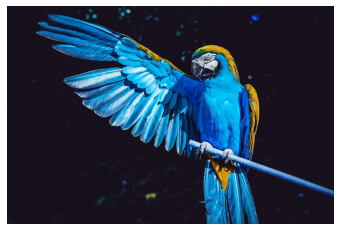

In [54]:
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/dojun/Documents/videosamples/ara.jpg', cv2.IMREAD_COLOR)

plt.axis('off')
plt.imshow(img)
plt.show()

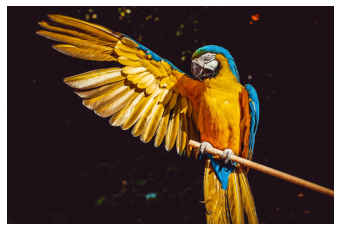

In [53]:
b, g, r = cv2.split(img)       # img를 b, r, g로 분리
img2 = cv2.merge([r, g, b])    # r, g, b로 바꿔서 merge

plt.axis('off')
plt.imshow(img2)
plt.show()

# 동영상 출력

In [8]:
import cv2

capture = cv2.VideoCapture("C:/Users/dojun/Documents/videosamples/Bee.mp4")

print(capture.get(cv2.CAP_PROP_POS_FRAMES))
print(capture.get(cv2.CAP_PROP_FRAME_COUNT))

while True:
    # 현재 프레임 갯수와 총 프레임 갯수를 비교
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("C:/Users/dojun/Documents/videosamples/Bee.mp4")   # 영상이 끝나면 다시 반복
    
#     print(capture.get(cv2.CAP_PROP_POS_FRAMES))
#     print(capture.get(cv2.CAP_PROP_FRAME_COUNT))
        
    ret, frame = capture.read()     # 카메라 작동 상태, 프레임 상태
    cv2.imshow('VideoFrame', frame)
    
    if cv2.waitKey(33) > 0:    # 눌러진 키의 값을 판단, 27 = ESC, 26 = Ctrl + Z, 3 = Ctrl + C, 24 = Ctrl + X,
        break
        
cv2.waitKey(0)
cv2.destroyAllWindows()

0.0
297.0


# 웹캠 실행

In [9]:
capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = capture.read()
    cv2.imshow('VideoFrame', frame)
    if cv2.waitKey(1) > 0:
        break
        
capture.release()          # 카메라 장치에서 받아온 메모리 해제
cv2.destroyAllWindows()

# 캡쳐 및 녹화(Capture & Record)

In [ ]:
import cv2
import datetime

capture = cv2.VideoCapture("C:/Users/dojun/Documents/videosamples/Bee.mp4")
fourcc = cv2.VideoWriter_fourcc(*'XVID')      # 코덱 선택
record = False    # 녹화 유/무 설정

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("C:/Users/dojun/Documents/videosamples/Bee.mp4")  # 반복 재생
        
    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")   # 현재 시간을 받아와 제목으로 사용
    key = cv2.waitKey(33)    # 33ms마다 갱신
    
    # 눌러진 키의 값을 판단
    # 27 = ESC, 26 = Ctrl + Z, 3 = Ctrl + C, 24 = Ctrl + X
    if key == 27:    
        break
    elif key == 26:  # cv2.imwrite("경로 및 제목", 이미지)를 이용하여 해당 이미지를 저장
        print("캡쳐")
        cv2.imwrite("C:/Users/dojun/Documents/videosamples/cap/" + str(now) + ".png", frame)
    elif key == 3:
        print("녹화 시작")   # video에 녹화할 파일 형식을 설정
        record = True
        video = cv2.VideoWriter("C:/Users/dojun/Documents/videosamples/mov/" + str(now) + ".avi", fourcc, 20.0, (frame.shape[1], frame.shape[0]))
        # cv2.VideoWriter("경로 및 제목", 비디오 포맷 코드, FPS, (녹화 파일 너비, 녹화 파일 높이))
    elif key == 24:          # video.release()를 사용하여 메모리를 해제
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

# 웹캠 캡쳐 & 녹화

In [ ]:
import cv2
import datetime

capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 코덱 선택 - DIVX도 가능
record = False    # 녹화 유/무 설정

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("C:/Users/dojun/Documents/videosamples/Bee.mp4")  # 반복 재생
        
    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")   # 현재 시간을 받아와 제목으로 사용
    key = cv2.waitKey(33)    # 33ms마다 갱신
    
    # 눌러진 키의 값을 판단
    # 27 = ESC, 26 = Ctrl + Z, 3 = Ctrl + C, 24 = Ctrl + X
    if key == 27:    
        break
    elif key == 26:  # cv2.imwrite("경로 및 제목", 이미지)를 이용하여 해당 이미지를 저장
        print("캡쳐")
        cv2.imwrite("C:/Users/dojun/Documents/videosamples/cap/" + str(now) + ".png", frame)
    elif key == 3:
        print("녹화 시작")   # video에 녹화할 파일 형식을 설정
        record = True
        video = cv2.VideoWriter("C:/Users/dojun/Documents/videosamples/mov/" + str(now) + ".avi", fourcc, 20.0, (frame.shape[1], frame.shape[0]))
        # cv2.VideoWriter("경로 및 제목", 비디오 포맷 코드, FPS, (녹화 파일 너비, 녹화 파일 높이))
    elif key == 24:          # video.release()를 사용하여 메모리를 해제
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import datetime

capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
video = cv2.VideoWriter('C:/Users/dojun/Documents/videosamples/mov/'+ str(now) + '_cap.avi', fourcc, 25.0, (640, 480))

while (cap.isOpened()):
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.filp(frame, 0)
        video.write(frame)
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    
    
capture.release()
cv2.destroyAllWindows()

# 윤곽선(Contour)

In [14]:
src = cv2.imread("C:/Users/dojun/Documents/videosamples/conts.png", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)
# 윤곽선(컨투어)를 검출하는 주된 요소는 하얀색의 객체를 검출하는 것
# 따라서 배경이 검은색이며 검출하려는 물체는 하얀색의 성질을 띄게끔 변형
# 이진화 처리 후, 반전시켜 검출하려는 물체를 하얀색의 성질을 띄도록 변환

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법), 이진화 이미지에서 윤곽선(컨투어)를 검색
# 반환값으로 윤곽선, 계층 구조를 반환
# 윤곽선은 Numpy 구조의 배열로 검출된 윤곽선의 지점들이 담김
# 계층 구조는 윤곽선의 계층 구조를 의미(각 윤곽선에 해당하는 속성 정보들)

for i in range(len(contours)):   # 윤곽선의 계층 구조를 표시
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print(i, hierarchy[0][i])
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()

0 [ 2 -1  1 -1]
1 [-1 -1 -1  0]
2 [ 4  0  3 -1]
3 [-1 -1 -1  2]
4 [ 6  2  5 -1]
5 [-1 -1 -1  4]
6 [ 8  4  7 -1]
7 [-1 -1 -1  6]
8 [ 9  6 -1 -1]
9 [10  8 -1 -1]
10 [11  9 -1 -1]
11 [-1 10 -1 -1]


In [15]:
ret

127.0

In [16]:
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# 얼굴 인식 - 사진

In [19]:
!pip show opencv-python

Name: opencv-python
Version: 4.5.1.48
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: c:\users\dojun\anaconda3\envs\python38\lib\site-packages
Requires: numpy
Required-by: 


In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('C:/Users/dojun/Documents/videosamples/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

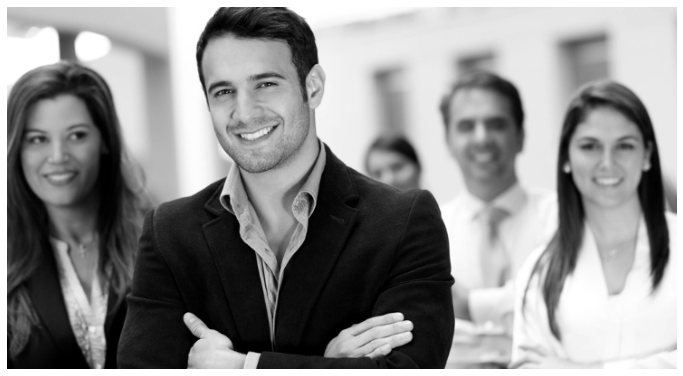

In [53]:
plt.figure(figsize = (12, 8))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [54]:
faces = face_cascade.detectMultiScale(src_gray, 1.1, 5) # 입력 이미지, 미지 피라미드 스케일 factor, 인접 객체 최소 거리 픽셀)
print(faces.shape)
print("Number of faces detected: " + str(faces.shape[0]))

(4, 4)
Number of faces detected: 4


In [55]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

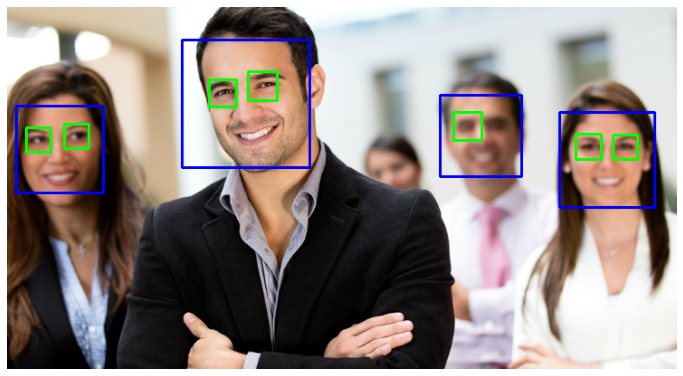

In [59]:
b, g, r = cv2.split(img)       # img를 b, r, g로 분리
img2 = cv2.merge([r, g, b])    # r, g, b로 바꿔서 merge

plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(img2)
plt.show()

In [61]:
cv2.imwrite('./py_data/videos/face_detected1.jpg', img)

True

# 얼굴 인식 - 동영상

In [78]:
import cv2
import timeit

# 영상 검출기
def videoDetector(cam,cascade):
    
    while True:
        
        start_t = timeit.default_timer()
        
        # 캡처 이미지 불러오기
        ret,img = cam.read()
        # 영상 압축
        img = cv2.resize(img,dsize=None,fx=1.0,fy=1.0)
        # 그레이 스케일 변환
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        # cascade 얼굴 탐지 알고리즘 
        results = cascade.detectMultiScale(gray,            # 입력 이미지
                                           scaleFactor= 1.3,# 이미지 피라미드 스케일 factor
                                           minNeighbors=5,  # 인접 객체 최소 거리 픽셀
#                                            minSize=(20,20)  # 탐지 객체 최소 크기
                                           )
                                                                           
        for box in results:
            x, y, w, h = box
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255), thickness=2)
     
        """ 알고리즘 연산 """ 
        # 알고리즘 종료 시점
        terminate_t = timeit.default_timer()
        FPS = 'fps' + str(int(1./(terminate_t - start_t )))
        cv2.putText(img,FPS,(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1)
        
        
         # 영상 출력        
        cv2.imshow('facenet',img)
        
        if cv2.waitKey(33) > 0: break

            
# 가중치 모델 불러오기
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 영상 파일 
cam = cv2.VideoCapture('C:/Users/dojun/Documents/videosamples/backkpink.mp4')


# 영상 탐지기
videoDetector(cam, cascade)
cv2.destroyAllWindows()

In [75]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')
cam = cv2.VideoCapture('C:/Users/dojun/Documents/videosamples/sample.mp4')

videoDetector(cam, cascade)
cv2.destroyAllWindows()

# 웹캠 - 얼굴 인식

In [82]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')
cam = cv2.VideoCapture(0)

videoDetector(cam, cascade)
cv2.destroyAllWindows()

# 웹캠 - 상체 인식

In [80]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')
cam = cv2.VideoCapture(0)

while True:
        
    start_t = timeit.default_timer()

    # 캡처 이미지 불러오기
    ret,img = cam.read()
    # 영상 압축
#     img = cv2.resize(img,dsize=None,fx=1.0,fy=1.0)
    # 그레이 스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # cascade 얼굴 탐지 알고리즘 
    results = cascade.detectMultiScale(gray, scaleFactor= 1.3,minNeighbors=5)

    for box in results:
        x, y, w, h = box
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255), thickness=2)

    """ 알고리즘 연산 """ 
    # 알고리즘 종료 시점
    terminate_t = timeit.default_timer()
    FPS = 'fps' + str(int(1./(terminate_t - start_t )))
    cv2.putText(img,FPS,(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1)


     # 영상 출력        
    cv2.imshow('facenet',img)

    if cv2.waitKey(33) > 0: break

cv2.destroyAllWindows()

In [81]:
cv2.destroyAllWindows()